In [67]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

def img_change_chanels(img):
    return cv2.merge(cv2.split(img)[::-1])

def show(img):
    plt.imshow(img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
def show_sub(images,x,y):
    for i in range(len(images)):
        plt.subplot(x,y,i+1)
        plt.imshow(images[i])
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [2]:
img = img = cv2.imread("./images/fushi.1.png")
img = img_change_chanels(img)

In [16]:
my_img = np.zeros([400,500,3],dtype = 'uint8')

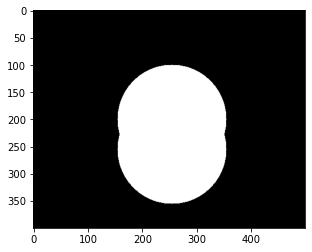

In [52]:
show(my_img)

In [22]:
my_img = cv2.circle(my_img,(255,200),100,(255,255,255),-1)

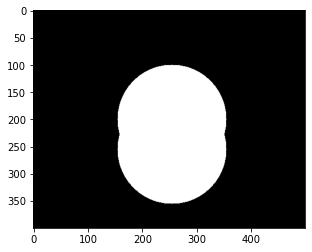

In [53]:
show(my_img)

In [32]:
# 开运算

In [33]:
kernel = np.ones([5,5],dtype = 'uint8')

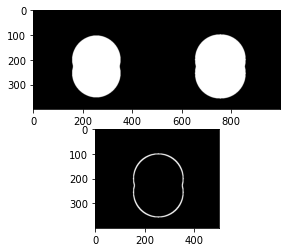

In [49]:
open_img = cv2.erode(my_img,kernel)
for i in range(0):
    open_img = cv2.erode(open_img,kernel)
close_img = cv2.dilate(my_img,kernel)
for i in range(0):
    close_img = cv2.dilate(close_img,kernel)
    
show(np.hstack([open_img,close_img]))
my_bound = close_img - open_img
images = [np.hstack([open_img,close_img]),my_bound]

show_sub(images,2,1)
                    

### cv api 演示

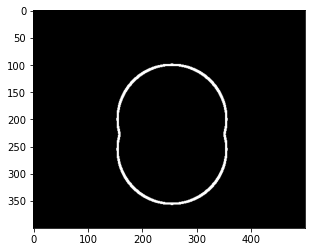

In [50]:
bound = cv2.morphologyEx(my_img,cv2.MORPH_GRADIENT,kernel)
show(bound)

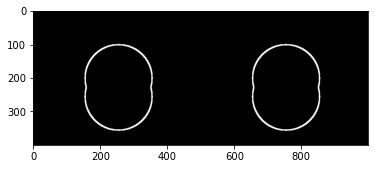

In [51]:
show(np.hstack([bound,my_bound]))

In [54]:
cv2.imwrite("./my_images/my_img.1.jpg",my_img)

True

In [55]:
cv2.imwrite("./my_images/my_img_bound.1.jpg",bound)

True

In [58]:
# 假设，不膨胀，就腐蚀两次 # 这是保留原信息的方式

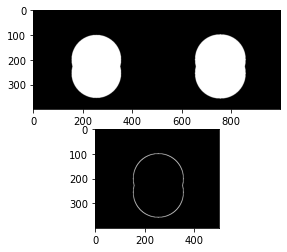

In [59]:
open_img = cv2.erode(my_img,kernel)
for i in range(1):
    open_img = cv2.erode(open_img,kernel) # 腐蚀
# close_img = cv2.dilate(my_img,kernel)
# for i in range(0):
#     close_img = cv2.dilate(close_img,kernel) # 膨胀

my_bound = close_img - my_img
images = [np.hstack([my_img,close_img]),my_bound]

show_sub(images,2,1)

### 礼帽 原始数据-开运算
### 黑帽 闭运算 - 原始数据

In [60]:
# 礼帽

In [61]:
img = img = cv2.imread("./images/fushi.1.png")
img = img_change_chanels(img)

# 二值化处理
def getBinImage(img,thres = 127,max_num = 255):
    indexs = np.mean(img,axis=2)
    chanel = np.copy(img[:,:,0])
    for i in range(len(indexs)):
        for j in range(len(indexs[0])):
            if indexs[i][j]<thres:
                chanel[i][j] = 0
            else:
                chanel[i][j] = max_num
    return cv2.merge([chanel,chanel,chanel])

img = getBinImage(img)

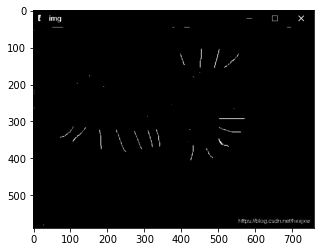

In [63]:
limao = cv2.morphologyEx(img,cv2.MORPH_TOPHAT,kernel)
show(limao) # 开运算会腐蚀噪声，原始数据减去开运算数据就剩噪声

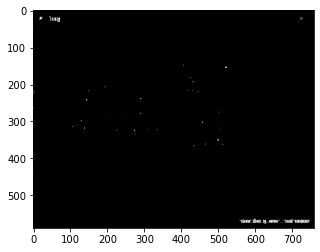

In [64]:
heimao = cv2.morphologyEx(img,cv2.MORPH_BLACKHAT,kernel)
show(heimao) # 会剩下轮廓

In [65]:
# 上述都是形态学的理论概念